In [34]:
#libraries
import numpy as np 
import pandas as pd
import math
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Part C

neural network using sklearn

In [35]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)

    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)

    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted

    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)
    import math


    def lookin(self,data):
        listx=[]
        listy=[]
        for index, row in data.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)):
            if i< len(self.clf.coefs_)-1:
                print("hidden layer ", i+1)
            else:
                print("output")
            datac=data.copy()
            l=(self.lookinlayer(datac,l,self.clf.coefs_[i],self.clf.intercepts_[i]))


    def lookinlayer(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            print("neuron ", k+1)
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction = bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
            plotting_test(data)    
        return rlist  
    
    # same as lookinlayer but without the plotting
    def lookinlayer1(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1  
        return rlist

    def getLastHiddenLayerInfo(self,data):
            listx=[]
            listy=[]
            val=[]        

#             for index, row in self.train.iterrows():
            for index, row in data.iterrows():
                listx.append(row["x"])
                listy.append(row["y"])
                val.append(row["value"])
            l=[listx,listy]
            for i in range(len(self.clf.coefs_)-1):
                data=self.train.copy()
                l=(self.lookinlayer1(data,l,self.clf.coefs_[i],self.clf.intercepts_[i]))
            l.append(val)
            return l


In [36]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [37]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [38]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

def plotting_train1(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.xlim([-3, 3])  
    plt.ylim([-3, 3])
    plt.show()

def plotting_train2(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
   

In [39]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Part C main

plotting train


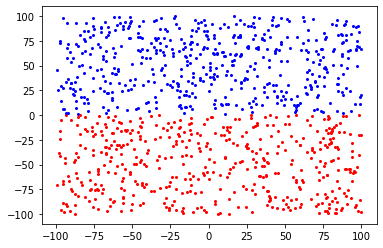

first test
0.998
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       510
           1       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



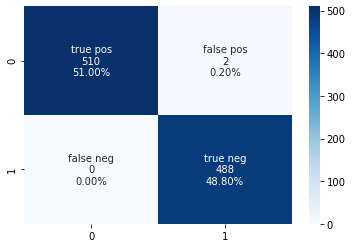

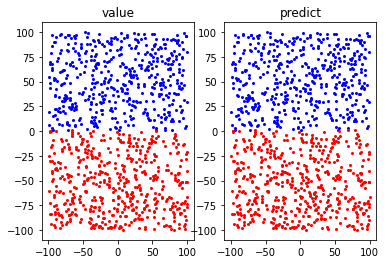

second test
1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



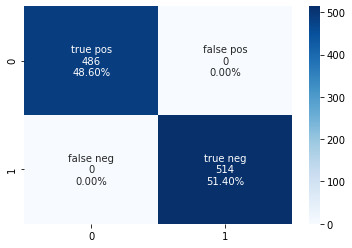

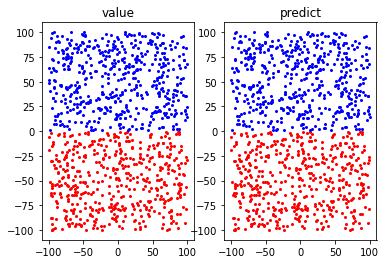

In [40]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,4))
net1.fit()
print("plotting train")
plotting_train2(train)
# net1.lookin(train)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
print(classification_report(test_y, pred1))
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
print(classification_report(test_y, pred2))
plotting_test(second_test)

In [41]:
# net1.lookin(train)

In [42]:
# net1.lookin(first_test)

In [43]:
# net1.lookin(second_test)

part b:

In [44]:
# using relu
# (5,2) ~0.935
# (5,10,10,5) ~ 0.985
# (5,10,10,10,5) ~0.975
# (10,20,10,5) ~0.975
# (10,5) ~0.98

# using sigmoid
# (5,2) ~0.935
# (10,5) ~0.98

plotting train


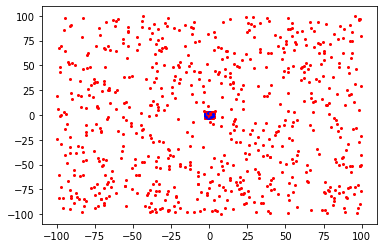

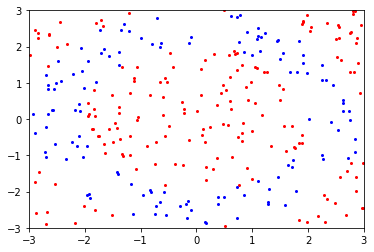

first test
0.982
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       870
           1       0.97      0.89      0.93       130

    accuracy                           0.98      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



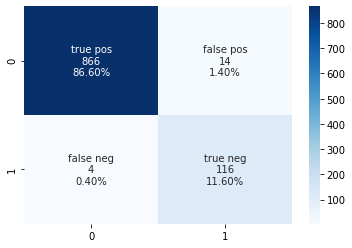

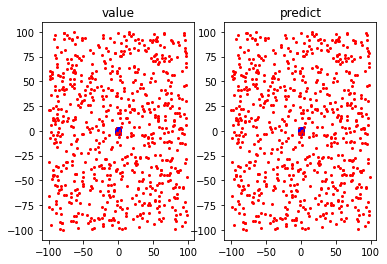

second test
0.983
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       867
           1       0.91      0.97      0.94       133

    accuracy                           0.98      1000
   macro avg       0.95      0.98      0.96      1000
weighted avg       0.98      0.98      0.98      1000



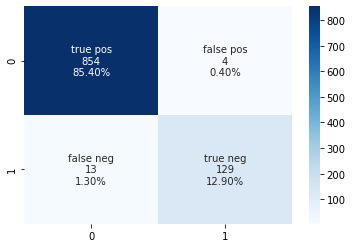

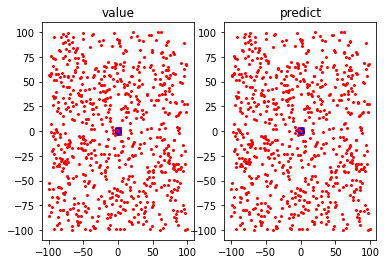

In [45]:
trainb = build_data_partB(9)
net2=NeuralNetwork(0.01,trainb,(5,10,10,4))
net2.fit()
print("plotting train")
plotting_train1(trainb)
# net2.lookin(trainb)

print("first test")
first_testb = build_data_partB(3)
test_yb=first_testb[["value"]]
pred1=net2.predict(first_testb)
print(net2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB(7)
test_yb=second_testb[["value"]]
pred2=net2.predict(second_testb)
print(net2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

hidden layer  1
neuron  1


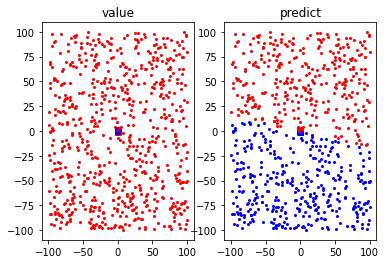

neuron  2


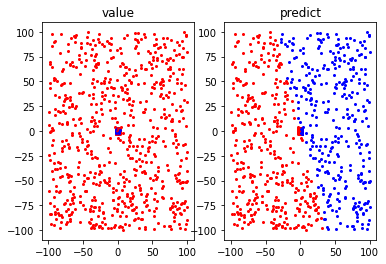

neuron  3


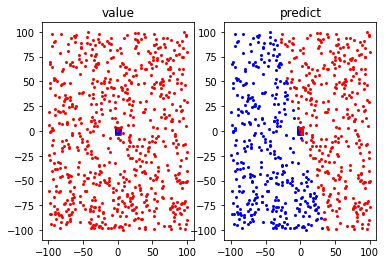

neuron  4


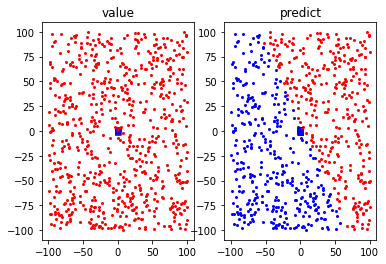

neuron  5


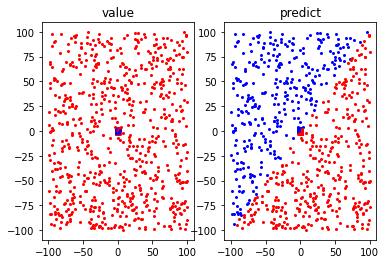

hidden layer  2
neuron  1


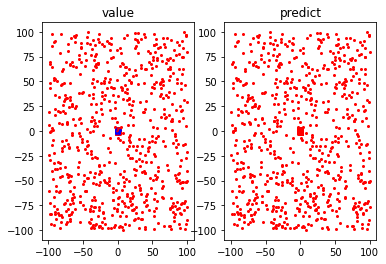

neuron  2


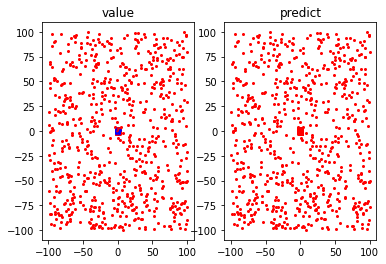

neuron  3


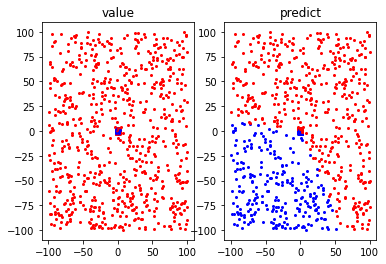

neuron  4


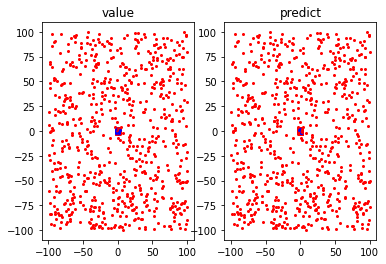

neuron  5


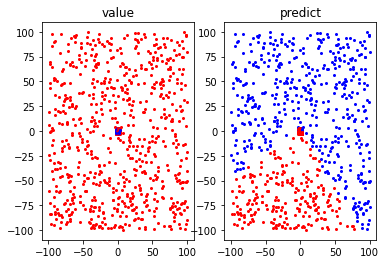

neuron  6


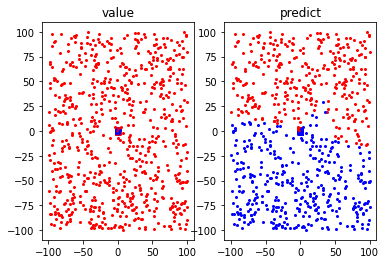

neuron  7


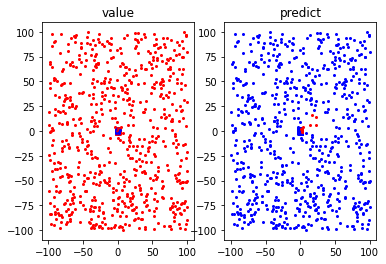

neuron  8


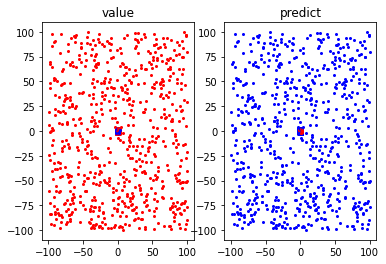

neuron  9


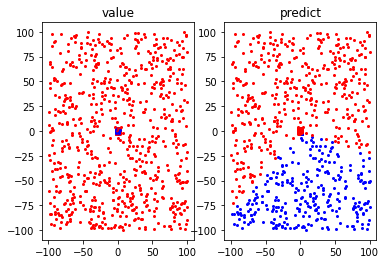

neuron  10


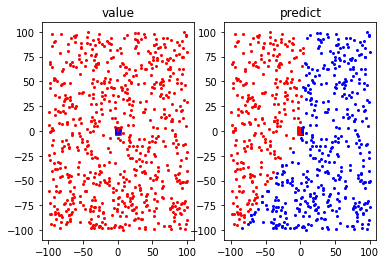

hidden layer  3
neuron  1


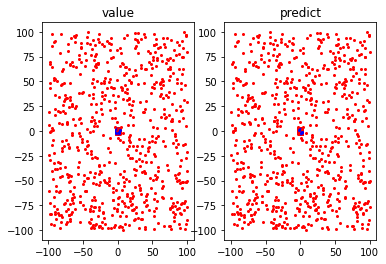

neuron  2


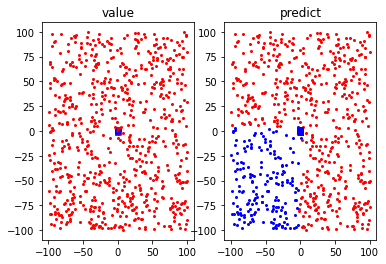

neuron  3


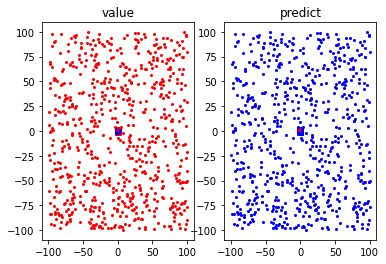

neuron  4


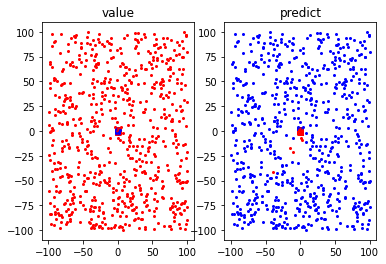

neuron  5


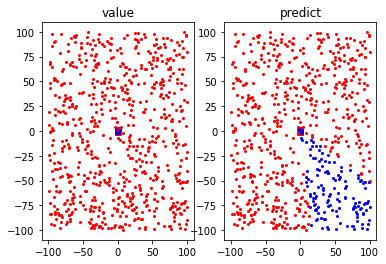

neuron  6


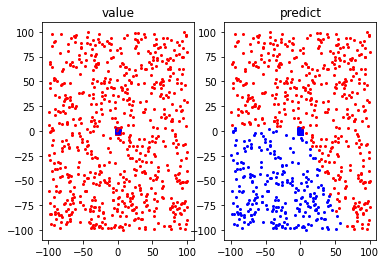

neuron  7


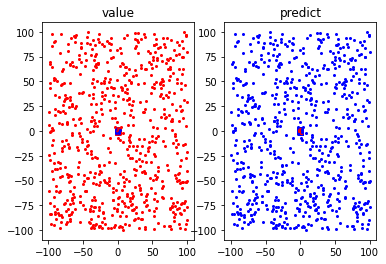

neuron  8


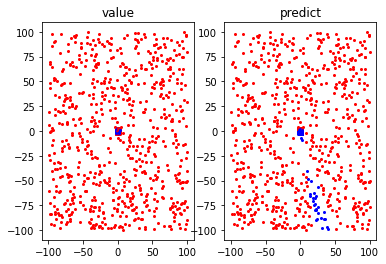

neuron  9


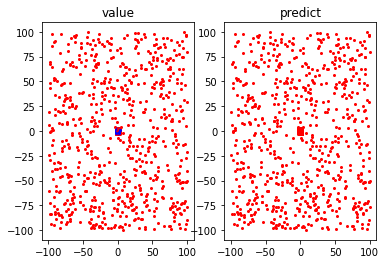

neuron  10


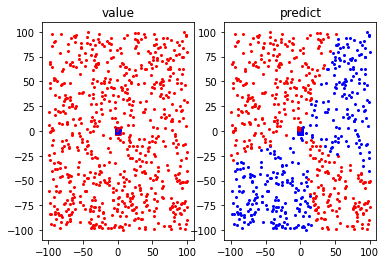

hidden layer  4
neuron  1


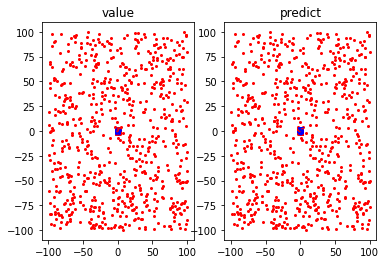

neuron  2


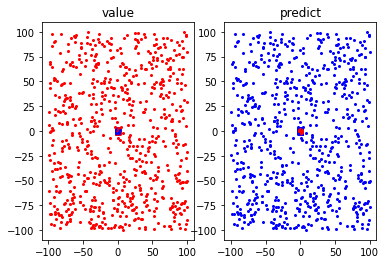

neuron  3


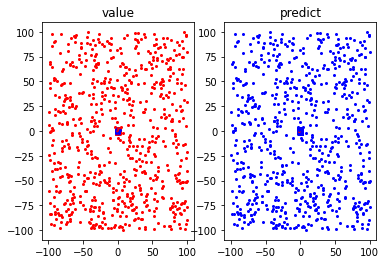

neuron  4


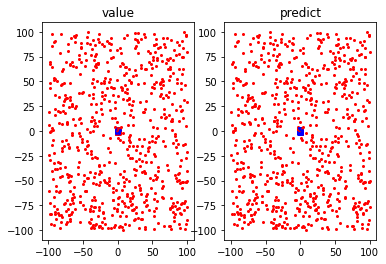

output
neuron  1


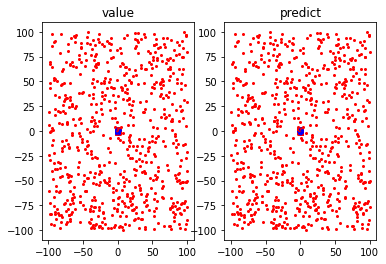

In [46]:
net2.lookin(trainb)

In [47]:
# net2.lookin(first_testb)

In [48]:
# net2.lookin(second_testb)

# part D

In [49]:
class Adaline:
    def __init__(self, learning_rate, train, num,epoch,change_lr):
        self.learning_rate = learning_rate
        self.train = train
        self.num=num # number of neurons in last layer
        self.epoch=epoch
        self.change_lr=change_lr

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self,num):
        weight = [] 
        for i in range(num):
            random.seed(i)
            rand = random.uniform(-0.1, 0.1)
            rand = round(rand, 4)
            weight.append(rand)
        print("start weights = \n", weight)
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        ERR = []
        mse = []
        EPS = 0.0001
        # generate weights and bias
        weight, bias = self._weight_genarate(self.num)
        oldmse=1
        count=0
        while(count<self.epoch):
            if(count==self.change_lr):
                self.learning_rate=self.learning_rate/2
                self.change_lr+=self.change_lr
            ERR = []
            # for each row we fix the bias and wights in order to get the minimum error
            for index, row in self.train.iterrows():
                predicted=bias/100
                for i in range(self.num):
                    predicted += row[i]/1000 * weight[i]
                for k in range(len(weight)):
                    weight[k] = round((weight[k] + self.learning_rate * (row["value"]-predicted) * row[k]/1000),3)
                bias= round((bias + self.learning_rate * (row["value"]-predicted)),3)
                # error calculation
                error = (row["value"] - predicted) ** 2
                # if the error is small enough return
                ERR.append(error)
            mse.append(np.sum(ERR))
            print(mse[-1])
            if len(mse) >= 2:
                # checking if the error is smaller then eps or if it hasnt changed
                if abs(mse[-1] - mse[-2]) < EPS  or abs(mse[-1] - mse[-2])==oldmse :
                    break
            # updating the old mse
            if len(mse)>=2:
                oldmse=abs(mse[-1] - mse[-2])
            count+=1
        print(count)
        return weight, bias

    

    
    
#     # this function predicts on a test data and returns the number of correct predictions
    def predict(self, dftest, test, weight, bias):
        count = 0
        pred = []
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for index, row in dftest.iterrows():
            predicted=bias/100
            for i in range(self.num):
                predicted += row[i]/1000 * weight[i]
#             print(predicted)
            if predicted > 0:
                predicted = 1
            else:
                predicted = -1
            pred.append(predicted)

            if predicted == row['value']:
                count += 1
        # now add the prediction list to the data set in order to make comparison 
        test['pred'] = pred
        return count

    # this function caculates the acuuracy of the predictions
    def score(self, pred, dftest):
        acurr = pred / len(dftest)
        res = round(acurr, 4)
        return res

plotting train


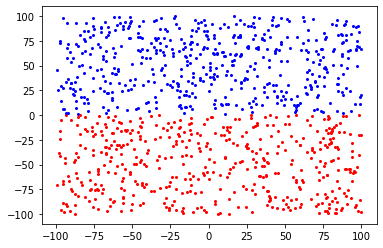

net last layer weight=
 [[ 2.12396395]
 [-1.45058846]
 [ 0.39187076]
 [-0.37723594]]
start weights = 
 [0.0689, -0.0731, 0.0912, -0.0524]
265.4887259634426
251.97549678670606
251.71361525752457
251.50494126555714
251.3061172031007
251.1085486282807
250.9038919014883
250.7114287227462
250.52055034604842
250.33239713924496
250.13973345881973
249.95681566074967
249.77275846482297
249.5907365456986
249.4071850174759
249.23071323835444
249.05794481395972
248.88817716079126
248.71710868939013
248.54683610685538
248.37978838722967
248.20937330248302
248.0481047389455
247.88522236025898
247.71849454716812
247.55943823064214
247.40406785768943
247.25041705188283
247.09236148912197
246.94261726588311
246.79030574631895
246.63957485173364
246.4917295984955
246.35087004302903
246.20802829972365
246.0662164804958
245.93224245688347
245.7873339157316
245.6537236200245
245.51355252029492
245.3779840479287
245.2436854724349
245.11094901393238
244.98517481582593
244.8514589243053
244.72144887910457
244

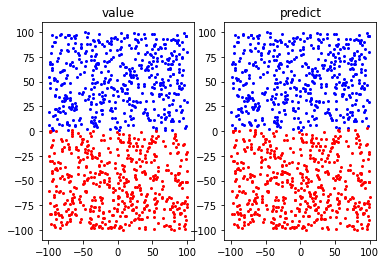

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       510
           1       1.00      0.99      0.99       490

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



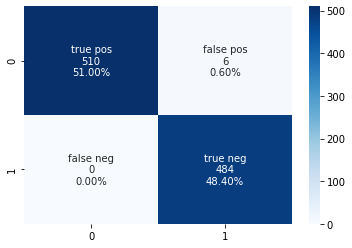

In [50]:
# create train df
traina=build_data_partA(1)
listA=net1.getLastHiddenLayerInfo(traina)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train2(traina)
        
        
# create test df
test = build_data_partA(9)
newtest = net1.getLastHiddenLayerInfo(test)
dftest = pd.DataFrame()
for i in range(len(newtest)):
    if(i<len(newtest)-1):
        dftest[i]=newtest[i]
    else:
        dftest["value"]=newtest[i]
print("net last layer weight=\n",net1.clf.coefs_[-1])
ada1 = Adaline(0.9, dftrain, len(listA)-1, epoch=50,change_lr=-1)
weight, bias = ada1.fit()
print("ada weight =\n",weight)
count=ada1.predict(dftest, test, weight, bias)
print(ada1.score(count, dftest))
plotting_test(test)
con_mat1 = confusion_matrix(test["pred"],test["value"])
confussion_matrix(con_mat1)
print(classification_report(test["value"],test["pred"]))

plotting train


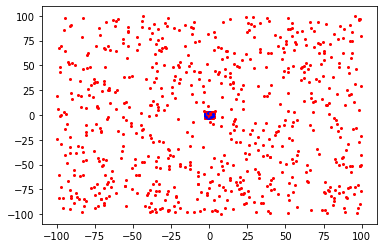

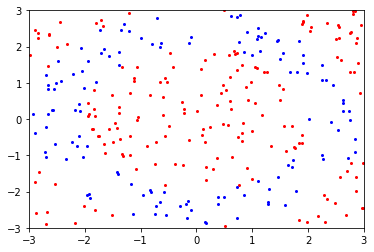

net last layer weight=
 [[ 2.51867915]
 [-1.71139022]
 [-2.98154091]
 [ 3.53077876]]
start weights = 
 [0.0689, -0.0731, 0.0912, -0.0524]
36566.44596260375
8798.6799139048
13459.278166998698
11341.776741781252
11866.517974863033
11626.796957879105
11494.014742072046
11453.075411077907
11298.506946742991
11273.760651868668
11221.637162188983
11059.847820469564
11109.566007330244
10845.978516317073
10951.470424488441
10841.638227113373
10709.29601269051
10724.142003319463
10540.002630637791
10514.481035125978
10503.057386501905
10358.995464348684
10281.179623226342
10169.524017051242
10129.462789933343
10064.263270630323
10009.632065380189
9976.82320226913
9875.998490678385
9725.16155255862
9726.642273374626
9627.23588036947
9593.479690841048
9538.468621600132
9455.177742604583
9375.949951068114
9348.341117777803
9201.389205561823
9182.474059164855
9094.403595808133
9057.566468549128
9004.681561753896
8969.332959793073
8860.61926732267
8764.615290466154
8711.58139352351
8655.02939849759


In [ ]:
trainb=build_data_partB(9)
listA=net2.getLastHiddenLayerInfo(trainb)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train1(trainb)

testb=build_data_partB(3)
listB=net2.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",net2.clf.coefs_[-1])        
# adab=Adaline(0.752, dftrain, len(listA)-1,epoch=90,change_lr=22)
adab=Adaline(0.66, dftrain, len(listA)-1,epoch=225,change_lr=-1)
weight,bias =adab.fit()
print("ada weight =\n",weight)
count=adab.predict(dftest,testb,weight, bias)
print(adab.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))

In [ ]:
#adab=Adaline(0.68, dftrain, len(listA)-1,epoch=200,change_lr=-1)

In [24]:
# (5,10,10,5)
# lr=0.745
# 132 epoch every 22 divide by 2 lr

# 0.842

### doing all the prosses for the data w/o adding extra to the middle

In [25]:
def build_data_partB1(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


plotting train


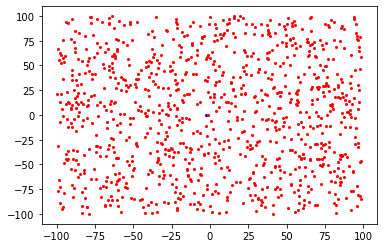

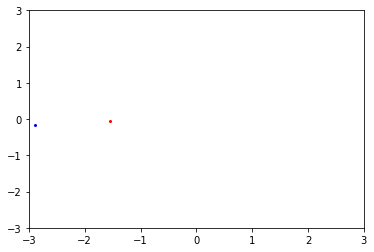

first test
0.999
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1000
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



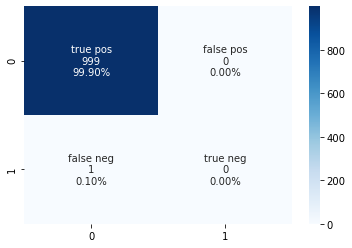

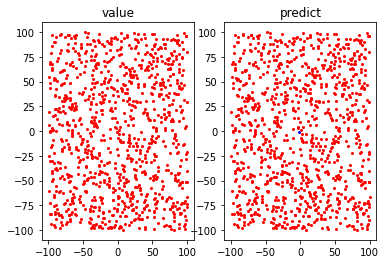

second test
0.999
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



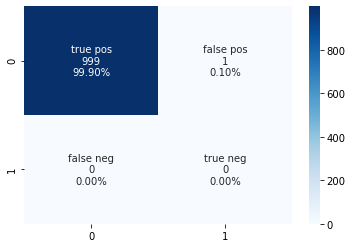

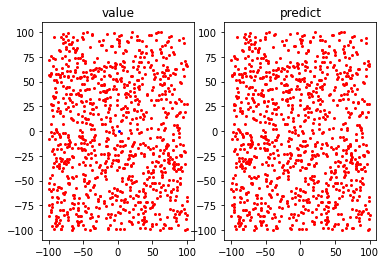

In [26]:
# switched train to data that had a dot in the area


trainb = build_data_partB1(3)
netb1=NeuralNetwork(0.01,trainb,(5,10,10,5))
netb1.fit()
print("plotting train")
plotting_train1(trainb)


print("first test")
first_testb = build_data_partB1(9)
test_yb=first_testb[["value"]]
pred1=netb1.predict(first_testb)
print(netb1.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB1(7)
test_yb=second_testb[["value"]]
pred2=netb1.predict(second_testb)
print(netb1.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

plotting train


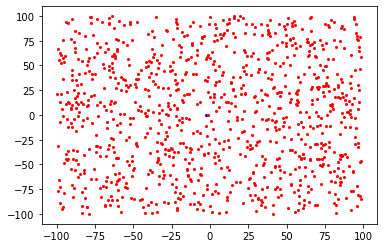

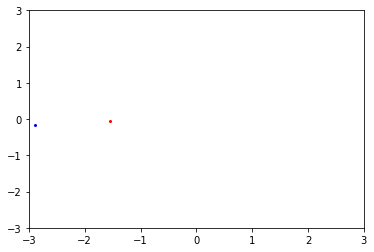

net last layer weight=
 [[-1.2061145 ]
 [ 0.67036337]
 [ 0.47998985]
 [-1.24760651]
 [ 0.42120599]]
start weights = 
 [0.0689, -0.0731, 0.0912, -0.0524, -0.0528]
59.00052896751423
4.800321885899291
4.25533176559418
4.191936686342814
4.147828994461487
4.111861801541276
4.083143425615147
4.059880320937961
4.043545766072919
4.0298802803919775
4.021623546200586
4.015963391589281
4.012310106923623
4.009889347322344
4.008944340099538
4.0082918463116926
4.0077446006659345
4.007677803107316
17
ada weight =
 [-0.083, 0.323, 0.454, -0.279, -0.053]
0.999


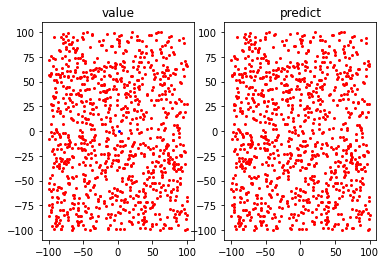

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



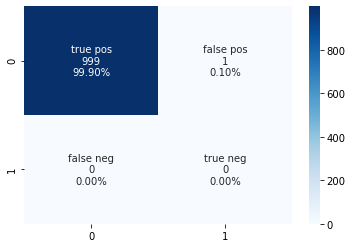

In [27]:
trainb=build_data_partB1(3)
listA=netb1.getLastHiddenLayerInfo(trainb)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train1(trainb)

testb=build_data_partB1(7)
listB=netb1.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",netb1.clf.coefs_[-1])        
ada_b1=Adaline(0.9, dftrain, len(listA)-1,epoch=100,change_lr=20)
weight,bias =ada_b1.fit()
print("ada weight =\n",weight)
count=ada_b1.predict(dftest,testb,weight, bias)
print(ada_b1.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))

In [28]:
### doing all the process for the data with big circle

In [29]:
def build_data_partB2(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(970):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
#         if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
        if 25<=(y[i]**2+x[i]**2)<=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(970,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-500, 500)
        randY = random.randint(-500, 500)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
#         if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
        if 25<=(y[i]**2+x[i]**2)<=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


plotting train


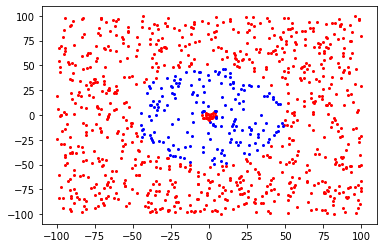

first test
0.981
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       803
           1       0.94      0.96      0.95       197

    accuracy                           0.98      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



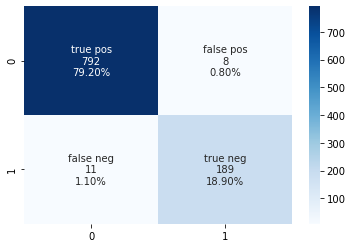

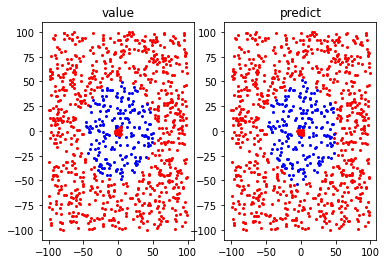

second test
0.977
              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       794
           1       0.96      0.93      0.94       206

    accuracy                           0.98      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



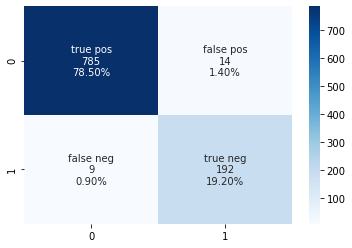

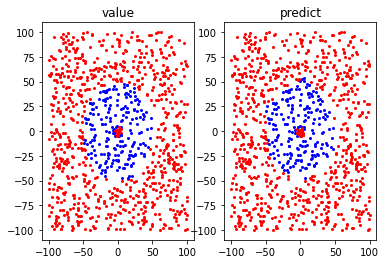

In [30]:
trainb = build_data_partB2(9)
netb2=NeuralNetwork(0.01,trainb,(4,4,4))
netb2.fit()
print("plotting train")
plotting_train2(trainb)


print("first test")
first_testb = build_data_partB2(3)
test_yb=first_testb[["value"]]
pred1=netb2.predict(first_testb)
print(netb2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB2(7)
test_yb=second_testb[["value"]]
pred2=netb2.predict(second_testb)
print(netb2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

hidden layer  1
neuron  1


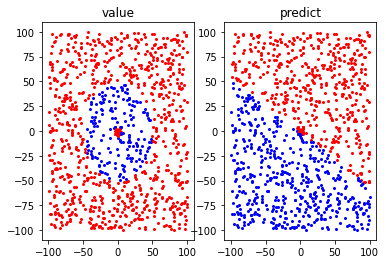

neuron  2


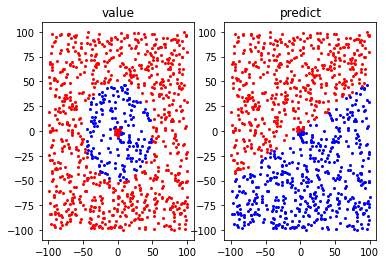

neuron  3


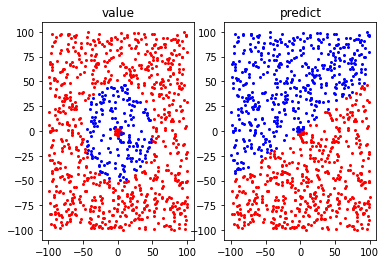

neuron  4


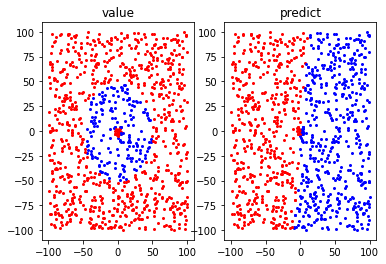

hidden layer  2
neuron  1


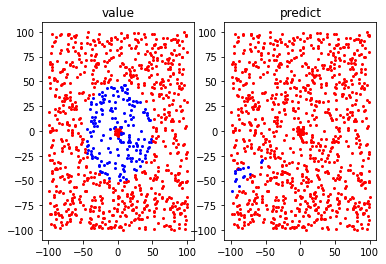

neuron  2


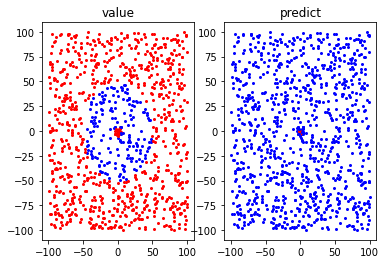

neuron  3


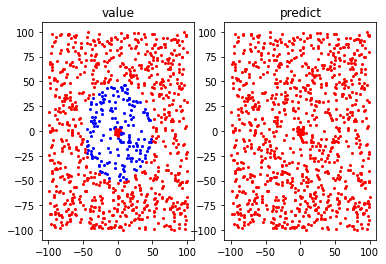

neuron  4


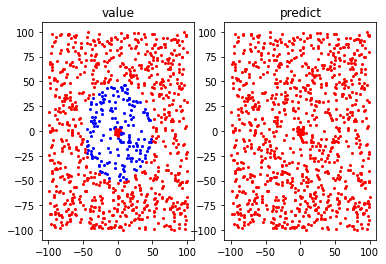

hidden layer  3
neuron  1


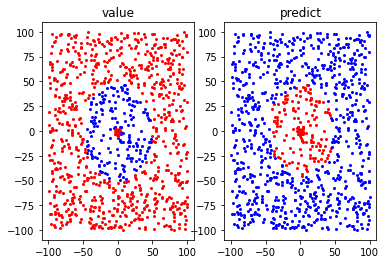

neuron  2


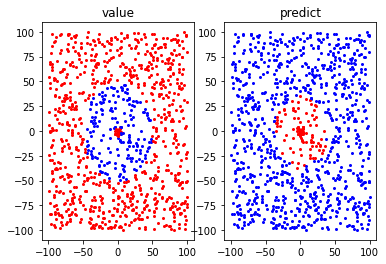

neuron  3


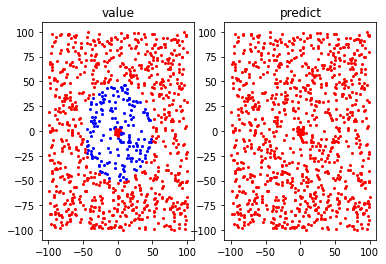

neuron  4


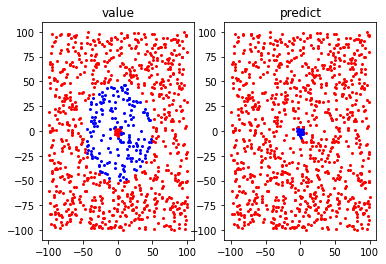

output
neuron  1


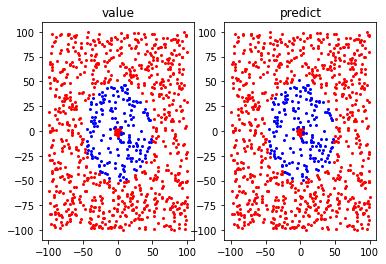

In [31]:
# 5,10,20,10,5 ~96.8
# 5,20,10,5 ~97.7
# 6,18,6 ~96.5
# 6,18,18,6 ~97.5
# 6,18,12,18,6 ~97.8    6,18,12,18,6,3 ~98.4  
# 6,18,9,18,6 ~98.5    6,18,9,18,6,4 ~98 better loook in
# 4,16,8,16,4 ~97.4
netb2.lookin(trainb)

[[1.0222286823808213, 0.8568572783663706, 6.420739702357729, 1.5921601651364776, 7.172026427408992, 3.1170333742252394, 7.8325525911972615, 0.8258479892434396, 1.7822690789247009, 2.414805175790047, 3.9944260846313284, 4.46114487983913, 7.68779604091584, 3.6248695229361427, 2.474249018174806, 0, 4.174116608472351, 0, 0, 4.33322987705581, 6.161150410440232, 5.075514469744251, 2.1533497790502585, 6.9638188554173865, 0.2991857823925139, 7.882202094658947, 8.176286451580973, 4.766768582129298, 0, 8.117671796634644, 5.7009999795317885, 6.357944334199313, 7.564797735373515, 5.991314037426868, 0.7873190444779992, 3.3962101377410763, 3.7956573446146216, 4.84279691635637, 7.27133670014082, 8.23435491396179, 3.9358942738051095, 5.650882389679129, 4.612280863780747, 6.463992607112754, 0, 4.110415654795059, 4.387249985606996, 8.023021948796707, 6.516807736379809, 2.248450915916883, 5.270075112582296, 0.6680578368322942, 0.24321773094986998, 8.891672901931312, 5.42908859319583, 5.510718943942589, 3

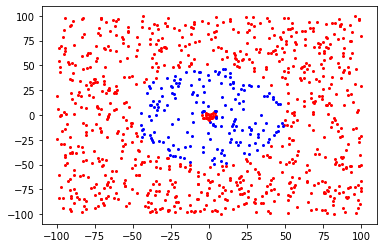

net last layer weight=
 [[-3.09641625]
 [-6.40291366]
 [-2.59022506]
 [-7.51971827]]
start weights = 
 [0.0689, -0.0731, 0.0912, -0.0524]
765.750189044016
608.3805571021202
586.1514856071807
582.4871489085554
581.4853065477757
580.9026393423887
580.4318875353184
579.980595165395
579.5391111623821
579.1054299147956
578.6765844041511
578.2556062712839
577.8385891461488
577.4202830919071
577.0011695542184
576.5927765220283
576.1968399232659
575.8068634014483
575.4204287698021
575.039463048114
574.6566860310525
574.27497098496
573.8933223506895
573.5119444904143
573.1312656168319
572.755289591374
572.3808489874602
572.011915724953
571.6478734143232
571.2843417090927
570.9379898481327
570.593132046439
570.2481077832393
569.9055248702512
569.5666693810965
569.2312100795648
568.9011002256404
568.5783886382009
568.2664990717911
567.9568489568193
567.6525502480974
567.3511540991191
567.0527561325641
566.7604262295612
566.4755051180703
566.1950300738403
565.9227571330272
565.6523116652863
565.38

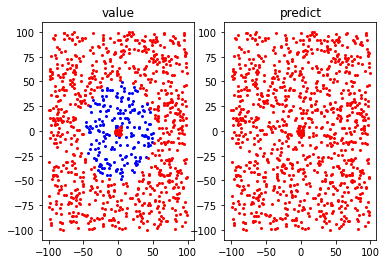

              precision    recall  f1-score   support

          -1       0.80      1.00      0.89       803
           1       0.00      0.00      0.00       197

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.64      0.80      0.72      1000



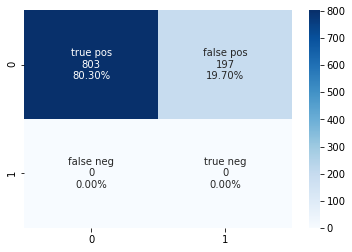

In [32]:
trainb=build_data_partB2(9)
listA=netb2.getLastHiddenLayerInfo(trainb)
print(listA)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print(dftrain.tail(50))
print(dftrain.describe())
print("plotting train")
plotting_train2(trainb)

testb=build_data_partB2(3)
listB=netb2.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",netb2.clf.coefs_[-1])        
ada_b2=Adaline(0.1, dftrain, len(listA)-1,epoch=100,change_lr=-1)
weight,bias =ada_b2.fit()
print("ada weight =\n",weight)
count=ada_b2.predict(dftest,testb,weight, bias)
print(ada_b2.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))